In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Boston House Pricing Dataset

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, 
                     sep="\s+", 
                     skiprows=22, 
                     header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = raw_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\d3smo\AppData\Local\Temp\ipykernel_17128\1494927156.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.rename(columns = {'MEDV':'Price'}, inplace = True) 

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

In [7]:
# Check for missing values
df.notnull().sum()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

In [8]:
# Correlation is important for any regression problem. Check for Correlation
# 1 is highly correlated. -1 inversely correlated. Different methods: pearson, kandall etc. (see .corr method) 
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

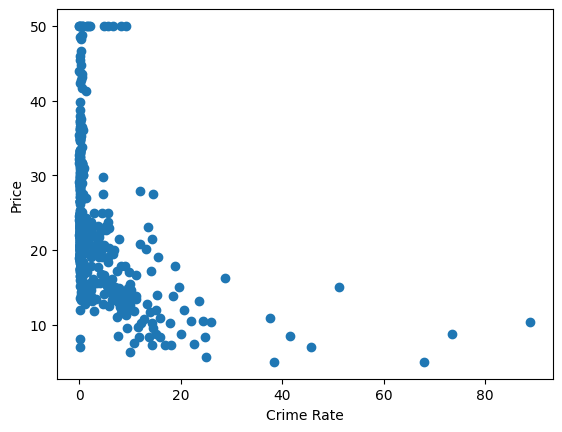

In [9]:
# What is the relation between Crime Rate & Price
plt.scatter(df['CRIM'],df['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

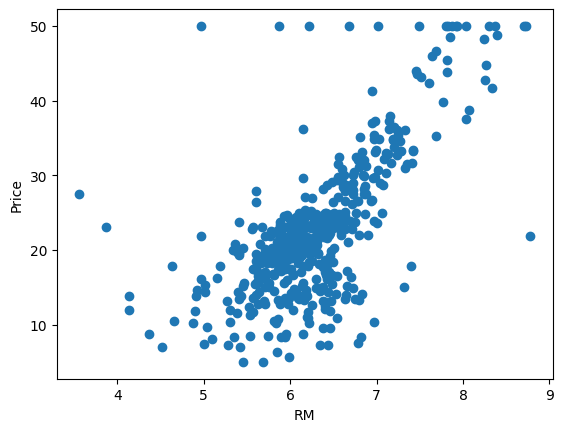

In [10]:
# What is the relation between Rooms & Price. More Rooms= High price

plt.scatter(df['RM'],df['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

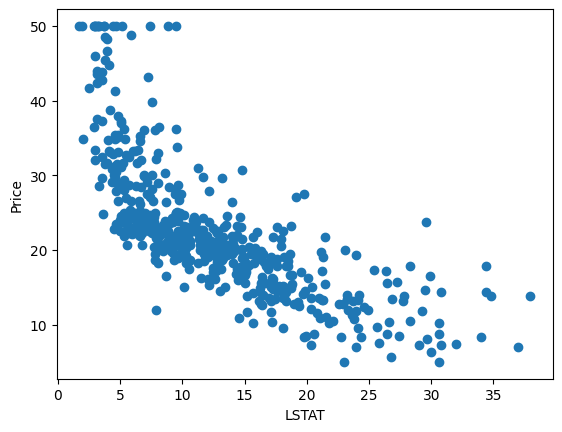

In [11]:
# What is the relation between LSTAT (% lower status of the population) & Price. Price high at higher status neighbourhood?

plt.scatter(df['LSTAT'],df['Price'])
plt.xlabel("LSTAT")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

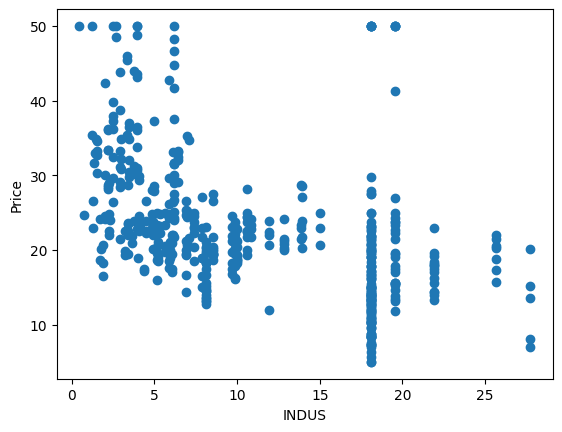

In [12]:
# What is the relation between INDUS (proportion of non-retail business acres per town) & Price. ???
plt.scatter(df['INDUS'],df['Price'])
plt.xlabel("INDUS")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

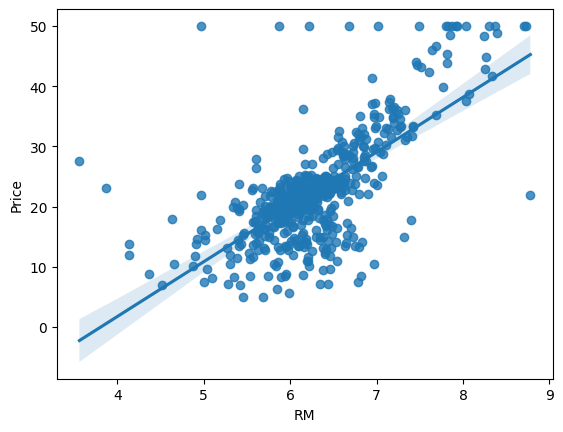

In [13]:
# Linear regression line between Price and Room

import seaborn as sns
sns.regplot(x="RM",y="Price",data=df)

<Axes: xlabel='LSTAT', ylabel='Price'>

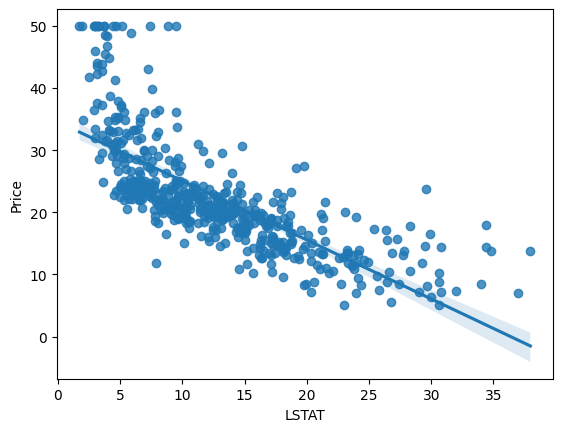

In [14]:
# Linear regression line between LSTAT and Room

sns.regplot(x="LSTAT",y="Price",data=df)

<Axes: xlabel='CHAS', ylabel='Price'>

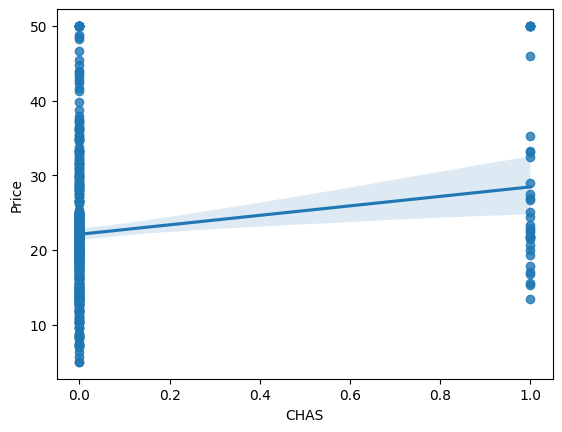

In [15]:
# Linear regression line between CHAS and Price. data should have linearity. As y increase, x increse. as y increase, x decrease etc.
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) Categorial data. 
sns.regplot(x="CHAS",y="Price",data=df)

<Axes: xlabel='PTRATIO', ylabel='Price'>

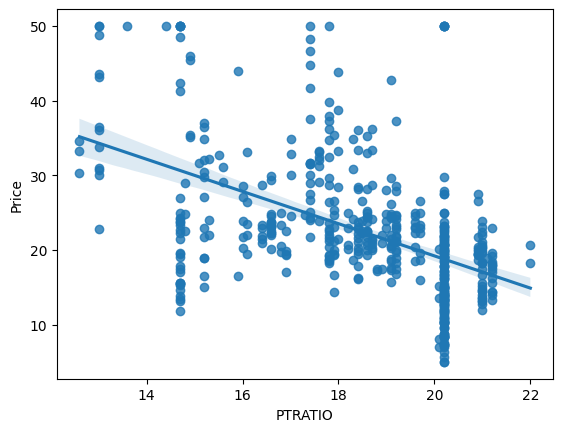

In [16]:
# Linear regression line between PTRatio (pupil-teacher ratio by town) and Price. Lower PT Ratio = higher price?

sns.regplot(x="PTRATIO",y="Price",data=df)

# Feature Engineering

In [17]:
# Change CHAS to boolean
df["CHAS"]=df["CHAS"].astype('bool')


In [18]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,False,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,False,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,False,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,False,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,False,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Split Dataset & Scale

In [19]:
# df.iloc[row_start:row_end, column_start:column_end]
# X will be all the df until the last column (Price)
# y will only be the last column hence -1 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,False,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,False,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,False,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,False,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,False,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [22]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,False,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,False,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,False,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,False,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,False,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [24]:
# Scale the data as the features have a wide range. eg. CRIM vs INDUS
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
# 1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.
# 2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.
# 3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

X_train=scaler.fit_transform(X_train)

In [26]:
# fit_tranform(..) cannot be used for X_test because test test should use the μ and σ calculated from the X_train data set. 
# fit_tranform(..) can only be used on training data set. 
# https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
# we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. 
# We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case
# If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each 
# feature and will let our model learn about our test data too.
X_test=scaler.transform(X_test)

In [27]:
# to export the scaling function
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Models

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression_model=LinearRegression()

In [30]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [31]:
### Prediction With Test Data
reg_pred=regression_model.predict(X_test)

In [32]:
#these are the results that we can compare to y_test. See how it performs
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

# Checks

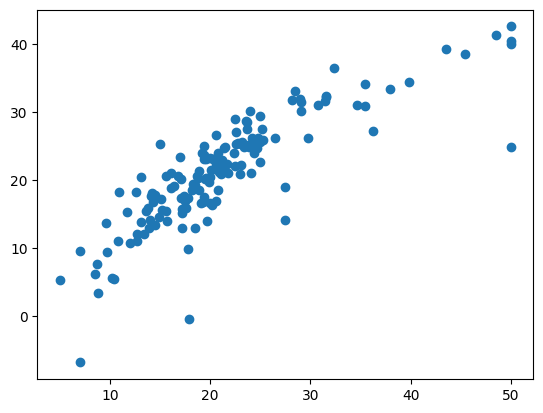

In [33]:
## plot a scatter plot for the prediction
# if the plot is linear like this, the model has perform well
plt.scatter(y_test,reg_pred)

In [34]:
# MSE measures the average squared difference between the estimated values and the actual value.
# MAE is the average distance between the real data and the predicted data, but fails to punish large errors in prediction. 
# RMSE Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.517444231177205
4.6386899261728205


In [35]:
# R^2 = 1 - SSR/SST 
# R^2 = coefficient of determination 
# SSR = sum of squares of residuals 
# SST = total sum of squares

from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7112260057484934


In [36]:
# Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
# where:
# R2: The R2 of the model n: The number of observations k: The number of predictor variables
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639312

In [37]:
## Residuals is the error. Actual (y_test) - Predict (reg_pred)
residuals=y_test-reg_pred

In [38]:
residuals

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: Price, Length: 152, dtype: float64

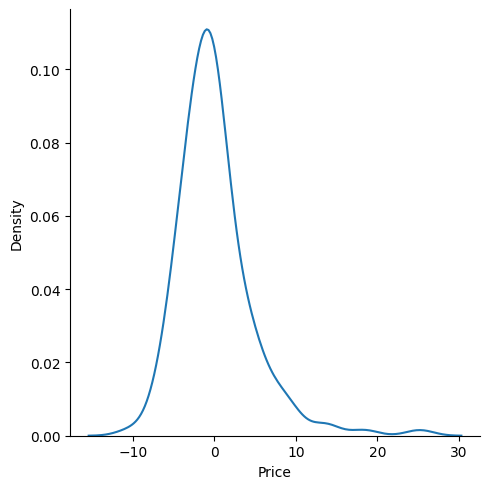

In [39]:
# Plotting the residual. Comes out a nice normal distribution. there are some outliers but in general. this is ok.
sns.displot(residuals,kind="kde")

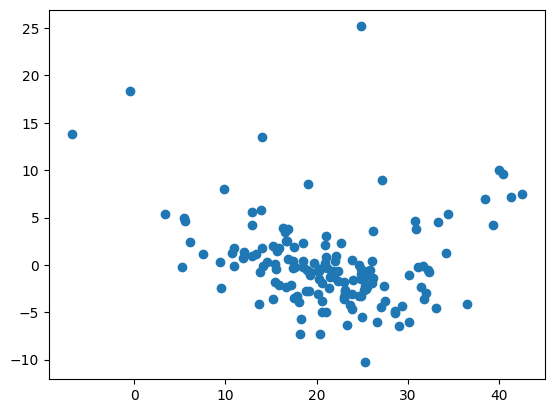

In [40]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

# New Data

In [41]:
data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [42]:
scaler.transform(data[0].reshape(1,-1))

c:\Users\d3smo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [43]:
regression_model.predict(scaler.transform(data[0].reshape(1,-1)))

c:\Users\d3smo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

Pickling the Model File for deployment

In [44]:
import pickle

In [45]:
# creating a regression model.pkl 
# 'wb' is to convert it into a byte stream
# What Pickle does is it “serializes” the object first before writing it to a file. 
# Pickling is a way to convert a Python object (list, dictionary, etc.) into a character stream. 
# The idea is that this character stream contains all the information necessary to reconstruct the object in another Python script. 
# It provides a facility to convert any Python object to a byte stream.

pickle.dump(regression_model,open('regmodel.pkl','wb'))


In [46]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [47]:
## Prediction
pickled_model.predict(scaler.transform(data[0].reshape(1,-1)))

c:\Users\d3smo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])